#### Ye, Frank
#### 260689448

### ECSE 508 Assignment 6 -  Evolutionary Dynamics Visualization with ESS Test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Define some helper methods.

In [8]:
def xyz_plot(coords):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    x, y, z = [], [], []

    for i in range(len(coords)):
        x.append(coords[i][0])
        y.append(coords[i][1])
        z.append(coords[i][2])
        
    ax.scatter(x, y, z, c='r')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('x3')
    plt.show()

In [3]:
def gen_rand(x_center, epsilon=0.01):
    """ Function that generates a perturbed point around a center, given a maximum perturbation radius
    Args:
        x_center: Starting point
        epsilon: max radius
    Returns:
        3D point to start

    """
    r = np.random.rand(1) * epsilon
    theta = np.random.uniform(0,2*np.pi, 1)
    x1 = np.cos(theta) * r
    x2 = np.sin(theta) * r
    x3 =  -(x1 + x2)
    x_new = x_center + np.array([x1, x2, x3]).flatten()
    return x_new

In [46]:
game1 = np.array([[0, 5, 4],
              [4, 0, 5],
              [5, 4, 0]])

game2 = np.array([[0,0,0,5,8],
                  [0,0,2,6,5],
                  [4,9,0,0,0],
                  [6,5,0,0,0],
                  [7,1,0,0,0]])

game2_A = np.array([[0,5,8],
                    [2,6,5]])

game2_B = np.array([[4,9],
                    [6,5],
                    [7,1]])


x_init = np.array([0.25, 0.5, 0.25])  # For game 1
NE_1 = np.array([1/3, 1/3, 1/3])
NE_2 = np.array([0.8, 0.2, 0, 0.75, 0.25]) # T B L C R
NE_2A = np.array([1/3, 2/3, 0])  # For game 2
NE_2B = np.array([4/5, 1/5]).T


eta = np.array([0.01, 0.1, 1])  # parameters for logit dynamics

#### a) Replicator Dynamics

In [12]:
def replicator_dynamics(x_initial, num_iter, matrix, learning_rate=1e-3):
    """ Function that returns list of coordinates given replicator dynamics and initial point

    Args:
        x_initial: Starting point
        num_iter: Number of iterations
        matrix: symmetric game matrix
    Returns:
        List of x coordinates of length num_iter

    """
    x_curr = x_initial.copy()
    positions = []
    
    for i in range(num_iter):
        positions.append(x_curr.copy())
        f = np.matmul(matrix, x_curr)
        avg_payoff = np.matmul(np.transpose(x_curr), f)  # Average payoff
        f_bar = np.multiply(avg_payoff, np.ones(3))  # Average payoff vector
        x_dot = np.multiply(x_curr, (f - f_bar))  # Displacement vector
        x_curr += learning_rate * x_dot  # Update position
        
    return positions  

<IPython.core.display.Javascript object>


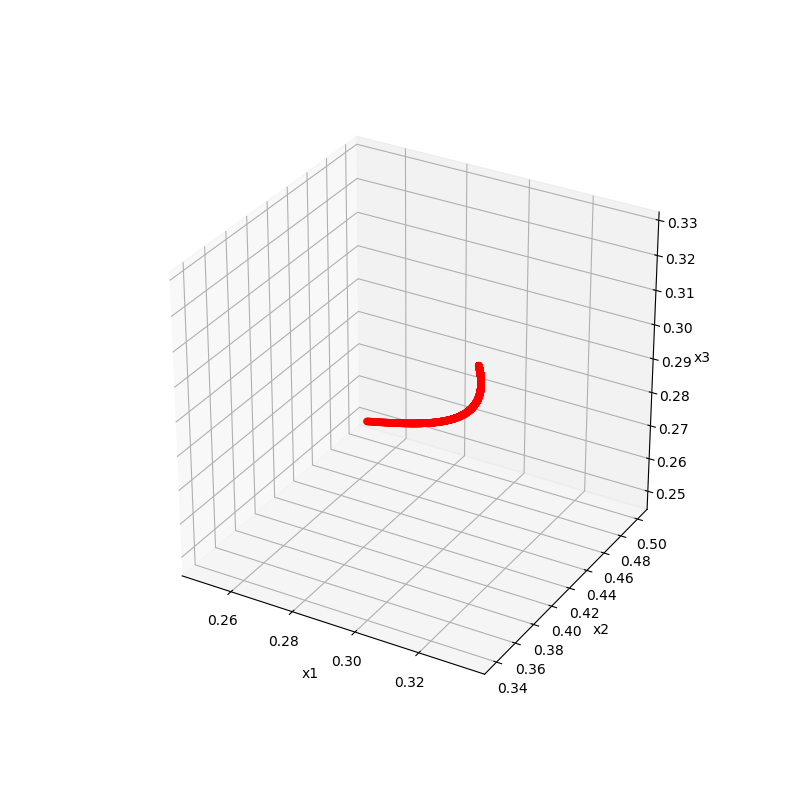

[array([0.33411614, 0.33923911, 0.32664475]),
 array([0.33411719, 0.33922895, 0.32665386]),
 array([0.33411823, 0.3392188 , 0.32666297]),
 array([0.33411927, 0.33920868, 0.32667205]),
 array([0.3341203 , 0.33919857, 0.32668113]),
 array([0.33412133, 0.33918847, 0.3266902 ]),
 array([0.33412235, 0.3391784 , 0.32669925]),
 array([0.33412337, 0.33916834, 0.3267083 ]),
 array([0.33412438, 0.33915829, 0.32671733]),
 array([0.33412538, 0.33914827, 0.32672635])]

In [18]:
iter_repl = 2000
coords_repl = replicator_dynamics(x_init, iter_repl, game1)
%matplotlib notebook
xyz_plot(coords_repl)
coords_repl[1990:]

#### b) Projection Dynamics

In [13]:
def projection_dynamics(x_start, max_iter, matrix, learning_rate=1e-3):
    """ Function that returns list of coordinates given projection dynamics and initial point

    Args:
        x_initial: Starting point
        num_iter: Number of iterations
        matrix: symmetric game matrix
    Returns:
        List of x coordinates of length num_iter

    """
    x_curr = x_start.copy()
    positions = []
    
    for i in range(max_iter):
        positions.append(x_curr.copy())
        f = np.matmul(matrix, x_curr)
        payoff_avg = np.matmul(np.transpose(x_curr), f)  # Average payoff
        f_bar = 1/len(x_start)*np.multiply(payoff_avg, np.ones(len(x_start)))  # Average payoff vector
        rho = np.maximum((f-f_bar),np.zeros(len(x_start))) 
        x_dot = rho - np.multiply(x_curr, rho.sum())  # Displacement vector
        x_curr += learning_rate * x_dot  # Update x
        
    return positions

<IPython.core.display.Javascript object>


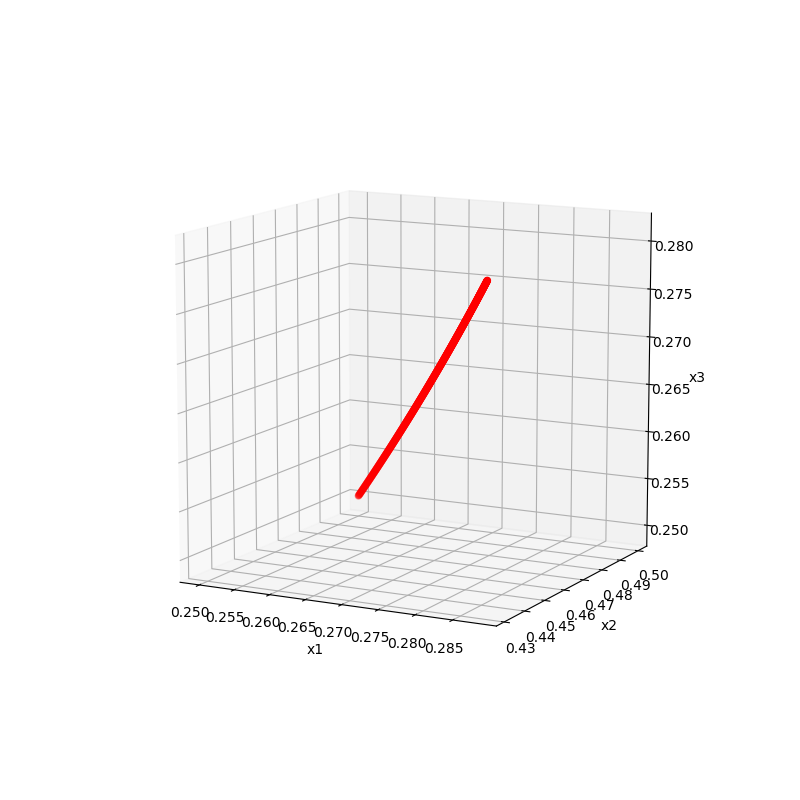

In [16]:
iter_proj = 500
coords_proj = projection_dynamics(x_init, iter_proj, game1, 1e-4)
%matplotlib notebook
xyz_plot(coords_proj)

#### c) Best Response Dynamics

In [19]:
def best_response(x_start, max_iter, matrix, learning_rate=1e-3):
    """ Function that returns list of coordinates given best response dynamics and initial point

    Args:
        x_initial: Starting point
        num_iter: Number of iterations
        matrix: symmetric game matrix
    Returns:
        List of x coordinates of length num_iter

    """
    x_curr = x_start.copy()
    coordinates = []
    
    for i in range(max_iter):
        coordinates.append(x_curr.copy())
        f = np.matmul(matrix, x_curr)
        k = np.argmax(f)  # Best response
        grad = np.zeros(len(x_start))
        grad[k] = 1
        x_dot = grad - x_curr  # Displacement vector
        x_curr += learning_rate * x_dot  # Update x
        
    return coordinates

<IPython.core.display.Javascript object>


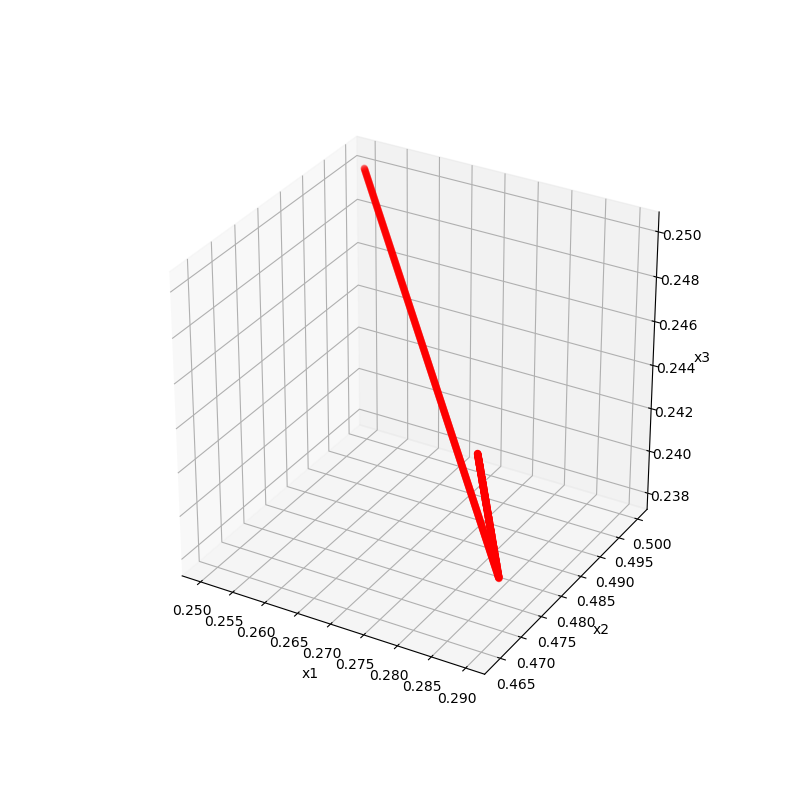

[array([0.28967305, 0.46433413, 0.24599282]), array([0.28964408, 0.4642877 , 0.24606822]), array([0.28971512, 0.46424127, 0.24604361]), array([0.28968615, 0.46419484, 0.24611901]), array([0.28975718, 0.46414842, 0.2460944 ]), array([0.2897282 , 0.46410201, 0.24616979]), array([0.28979923, 0.4640556 , 0.24614517]), array([0.28977025, 0.46400919, 0.24622056]), array([0.28984127, 0.46396279, 0.24619593]), array([0.28981229, 0.4639164 , 0.24627131])]


In [20]:
iter_br = 750
coords_br = best_response(x_init, iter_br, game1, 1e-4)
%matplotlib notebook
xyz_plot(coords_br)
print(coords_br[740:])

#### d) BNN Dynamics

In [26]:
def bnn_dynamics(x_initial, num_iter, matrix, learning_rate=1e-3):
    """ Function that returns list of coordinates given BNN dynamics and initial point

    Args:
        x_initial: Starting point
        num_iter: Number of iterations
        matrix: symmetric game matrix
    Returns:
        List of x coordinates of length num_iter

    """
    x_curr = x_initial.copy()
    positions = []
    
    for i in range(num_iter):
        positions.append(x_curr.copy())
        f = np.matmul(matrix, x_curr)
        avg_payoff = np.matmul(np.transpose(x_curr), f)  # Average payoff
        f_bar = np.multiply(avg_payoff, np.ones(3))  # Average payoff vector
        pi_hat_plus = np.maximum((f-f_bar),np.zeros(3)) # sign function pi_hat
        x_dot = pi_hat_plus - np.multiply(x_curr, pi_hat_plus.sum())  # Displacement vector
        x_curr += learning_rate * x_dot  # Update position
        
    return positions  

<IPython.core.display.Javascript object>


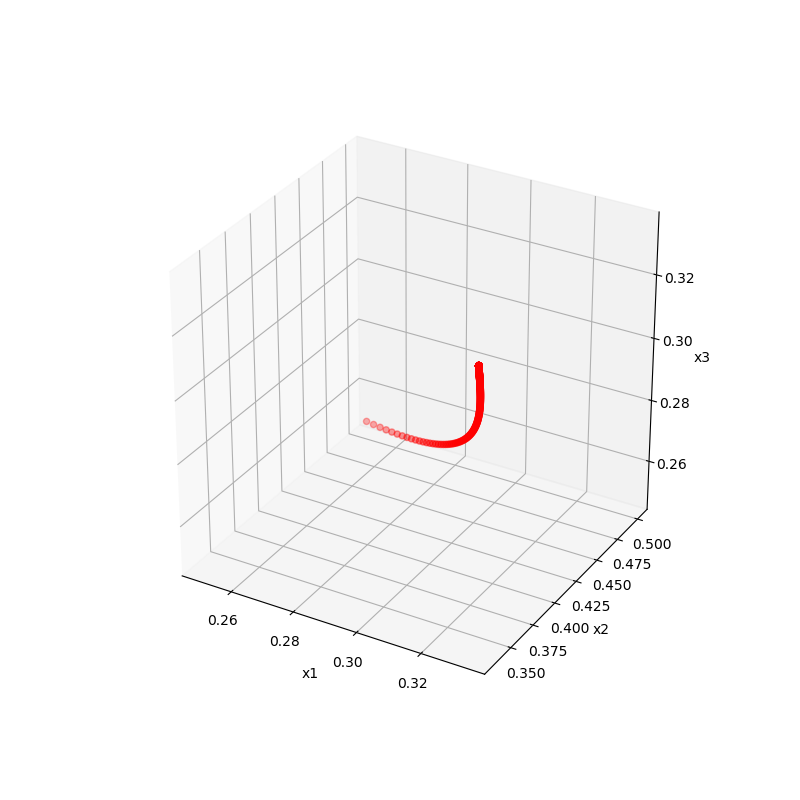

[array([0.33332642, 0.33336181, 0.33331177]), array([0.33332653, 0.33336136, 0.33331211]), array([0.33332664, 0.33336091, 0.33331244])]


In [27]:
max_iter = 500
coords_b = bnn_dynamics(x_init, max_iter, game1, 1e-2)
%matplotlib notebook
xyz_plot(coords_b)
print(coords_b[497:])

#### e) Smith Dynamics

In [29]:
def smith_dynamics(x_initial, num_iter, matrix, learning_rate=1e-3):
    """ Function that returns list of coordinates given Smith dynamics and initial point

    Args:
        x_initial: Starting point
        num_iter: Number of iterations
        matrix: symmetric game matrix
    Returns:
        List of x coordinates of length num_iter

    """
    x_curr = x_initial.copy()
    positions = []
    
    for i in range(num_iter):
        
        positions.append(x_curr.copy())
        f_i = np.matmul(matrix, x_curr)
        j = np.random.rand(3)
        j /= np.sum(j)
        f_j = np.matmul(matrix, j)
        pi_i = np.matmul(np.transpose(x_curr), f_i)  # current payoff
        pi_j = np.matmul(np.transpose(j), f_j)   # random payoff
        if ((pi_i - pi_j) > 0).all():
            x_dot = f_i - f_j  # Displacement vector
        else:
            x_dot = np.zeros(3)
        x_curr += learning_rate * x_dot  # Update position
        
    return positions  

<IPython.core.display.Javascript object>


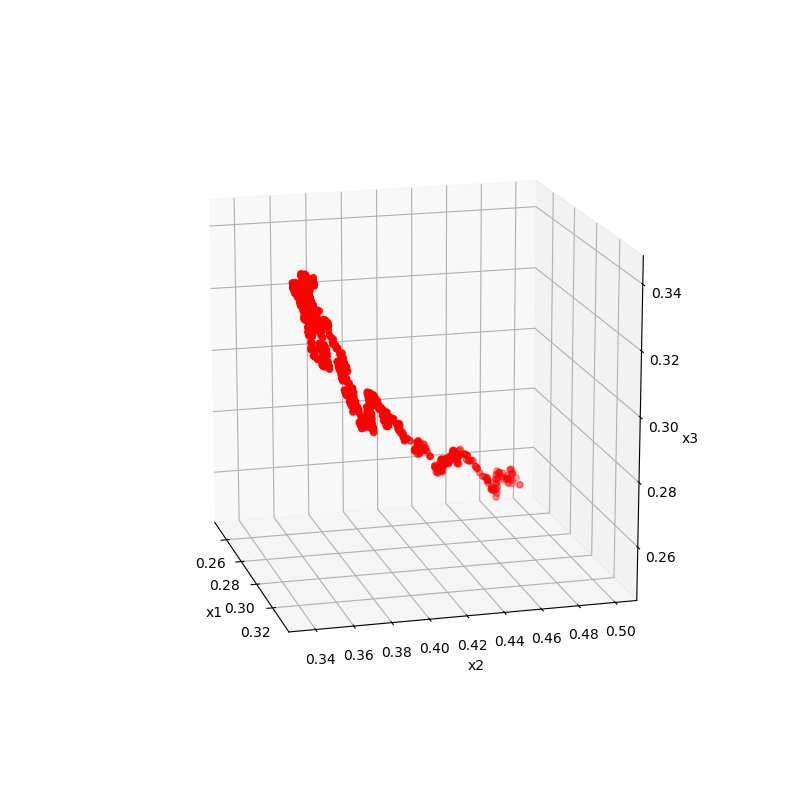

[array([0.31951572, 0.34688763, 0.33359665]),
 array([0.32038144, 0.3466801 , 0.33293846]),
 array([0.31945887, 0.34646489, 0.33407624]),
 array([0.31842457, 0.34725044, 0.334325  ]),
 array([0.31759965, 0.34781515, 0.33458521]),
 array([0.31833011, 0.34687737, 0.33479253]),
 array([0.31885093, 0.34641686, 0.33473221]),
 array([0.31833649, 0.34775707, 0.33390644]),
 array([0.31684591, 0.3494172 , 0.33373688]),
 array([0.31713596, 0.34986155, 0.3330025 ])]

In [31]:
max_iter = 1000
coords_c = smith_dynamics(x_init, max_iter, game1, 1e-3)
xyz_plot(coords_c)
coords_c[990:]

#### f) Logit Dynamics

In [32]:
def sigmoid(vector, eta):
    """Function that applies the sigmoid function given eta parameter

    Args:
        vector: vector to pass through logit function
        eta: temperature
    Returns:
        List of x coordinates
    
    """
    
    return np.exp(1./eta*vector)/np.exp(1./eta*vector).sum()

def logit_dynamics(x_initial, num_iter, matrix, eta=1e-2,learning_rate=1e-2):
    """ Function that returns list of coordinates given logit dynamics and initial point

    Args:
        x_initial: Starting point
        num_iter: Number of iterations
        matrix: symmetric game matrix
        eta: temperature
    Returns:
        List of x coordinates of length num_iter

    """
    x_curr = x_initial.copy()
    positions = []
    
    for i in range(num_iter):
        positions.append(x_curr.copy())
        f = np.matmul(matrix, x_curr)
        x_dot = sigmoid(f, eta) - x_curr  # Displacement vector
        x_curr += learning_rate * x_dot  # Update position
        
    return positions

<IPython.core.display.Javascript object>


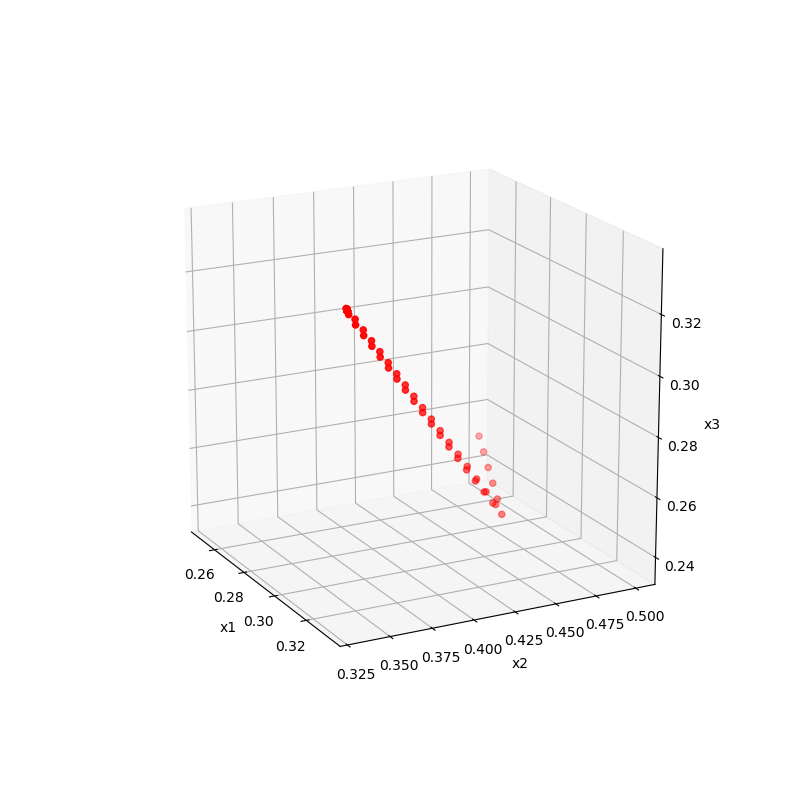

[array([0.33333333, 0.33333333, 0.33333333]),
 array([0.33333333, 0.33333333, 0.33333333]),
 array([0.33333333, 0.33333333, 0.33333333]),
 array([0.33333333, 0.33333333, 0.33333333]),
 array([0.33333333, 0.33333333, 0.33333333])]

In [35]:
max_iter = 75
coords_d1 = logit_dynamics(x_init, max_iter, game1, eta[0])  # eta = 0.01
xyz_plot(coords_d1)
coords_d1[70:]

Plot Borel set at x given epsilon

<IPython.core.display.Javascript object>


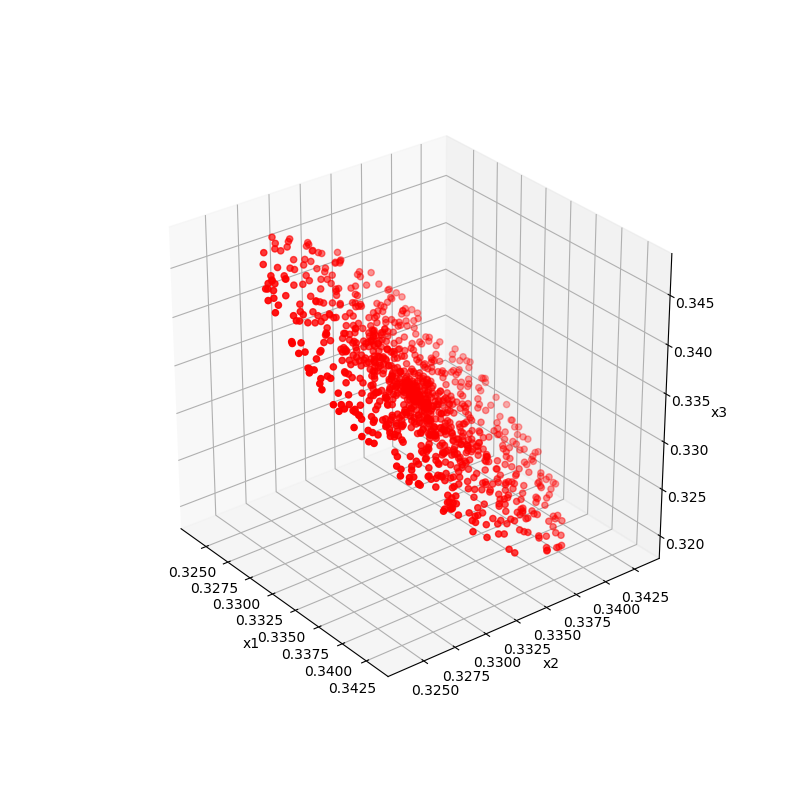

In [37]:
glory = []
for i in range(1000):
    glory.append(gen_rand(NE_1))
    
glory = np.array(glory)
# %matplotlib notebook
xyz_plot(glory)

In [38]:
def check_C1(center, points, matrix, slack=1e-15):
    F = np.matmul(matrix, center)
    for point in points:
        z = point - center
        if (np.dot(z, F) > slack):
            return False
    return True

In [43]:
def check_C2(center, points, matrix, epsilon_hat=0.01,slack=1e-15):
    
    
    for point in points:
        epsilon = np.sqrt(point[0] ** 2 + point[1] ** 2)
        point_util = epsilon * point + (1-epsilon) * center
        F = np.matmul(matrix, point_util)
        z = point - center
        if (np.dot(z, F) > slack):
            return False
    return True

In [44]:
check_C1(NE_1, glory, game1)

True

In [45]:
check_C2(NE_1, glory, game1)

True

Inspect game 2

In [47]:
NE_2_A = np.array([1/3, 2/3, 0])
NE_2_B = np.array([4/5, 1/5]).T

#### Check game 1 dynamics

Replicator dynamics

In [62]:
iter_dyn= 1000
x_init = gen_rand(NE_1)
x_replicator = replicator_dynamics(x_init, iter_dyn, game1)

print(x_replicator[-1])  # Print last position generated
print(NE_1 - x_replicator[-1])

[0.33401109 0.33236923 0.33361969]
[-0.00067775  0.00096411 -0.00028636]


Projection dynamics

In [59]:
iterations = 500
x_init = gen_rand(NE_1)
proj = projection_dynamics(x_init, iterations,game1)

print(proj[-1])  # Print last position generated
print(NE_1 - proj[-1])

[0.33336698 0.33333956 0.33329346]
[-3.36511235e-05 -6.22349976e-06  3.98746233e-05]


BR dynamics

In [58]:
iterations = 1000
x_init = gen_rand(NE_1)
x_br = best_response(x_init, iterations, game1)

print(x_br[-1])
print(NE_1 - x_br[-1])

[0.33370654 0.33300206 0.33329139]
[-3.73210129e-04  3.31271351e-04  4.19387782e-05]


BNN dynamics

In [64]:
iterations = 500
x_init = gen_rand(NE_1)
x_bnn = bnn_dynamics(x_init, iterations, game1)

print(x_bnn[-1])
print(NE_1 - x_bnn[-1])

[0.33333141 0.33352318 0.33314541]
[ 1.91879771e-06 -1.89843920e-04  1.87925122e-04]


Smith dynamics

In [72]:
iterations = 1000
x_init = gen_rand(NE_1)
x_smith = smith_dynamics(x_init, iterations, game1)

print(x_smith[-1])
print(NE_1 - x_smith[-1])

[0.34376177 0.33055426 0.32568397]
[-0.01042844  0.00277908  0.00764936]


Logit dynamics

In [74]:
iterations = 1000
x_init = gen_rand(NE_1)
x_logit = logit_dynamics(x_init, iterations, game1)

print(x_logit[-1])
print(NE_1 - x_logit[-1])

[0.33333333 0.33333333 0.33333333]
[1.11022302e-16 0.00000000e+00 5.55111512e-17]


Note the instability of some dynamics, such as Smith pair-wise comparison dynamics. However, irrespective of the dynamic choice, since the NE is ESS, all dynamics converge eventually.